In [244]:
"""
Autor: Sebastian Carmona Estrada
"""

import pdb
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import accuracy_score



# Exploración de los datos

In [245]:
ds_train = pd.read_csv(r'train.csv')
ds_test = pd.read_csv(r'test.csv')

ds_train

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.00,17,594.77,ATM_INT,20150515,US,ATM_INT,5,...,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.00,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,...,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,622529101,1,993430.04,19,180.65,POS,20150519,US,POS,2,...,103918285.0,95475378.0,4,8944.83,2236.21,3646.67,4,96.86,4552.41,484.30
2961,2043206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,...,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2962,2943206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,...,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2963,3136302872,0,996191.64,15,234.42,POS,20150513,US,MCI,3,...,56666000.0,37600750.0,1,NaN,NaN,NaN,3,219.46,4552.41,1316.79


In [246]:
ds_test

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_COL,Dist_max_INTER,Canal1,FECHA_FRAUDE,COD_PAIS,CANAL,...,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Sum_NAL,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Dist_mean_NAL,Dist_sum_INTER,Dist_mean_INTER
0,98523068,NaN,42230.09,18,1.00,1.00,POS,20150515,US,POS,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
1,300237898,NaN,143202.65,20,614.04,7632.97,POS,20150506,US,MCI,...,6092.69,7632.97,2,1228.07,614.04,4552.41,1228.07,614.04,24370.75,6092.69
2,943273308,NaN,243591.25,2,286.84,2443.14,ATM_INT,20150517,EC,ATM_INT,...,1743.52,2443.14,7,1944.35,138.88,5083.41,1944.35,138.88,6974.09,1743.52
3,951645809,NaN,238267.40,20,1.00,1.00,ATM_INT,20150508,EC,ATM_INT,...,NaN,NaN,1,NaN,NaN,904.81,1.00,1.00,1.00,1.00
4,963797516,NaN,490403.58,13,1.00,1.00,ATM_INT,20150501,US,ATM_INT,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9970518152,NaN,531534.03,13,340.09,1.00,POS,20150501,US,POS,...,NaN,NaN,4,844.35,56.29,4552.41,844.35,56.29,1.00,1.00
96,9971748725,NaN,52035.08,11,28.59,4552.41,POS,20150503,AW,POS,...,4552.41,4552.41,3,151.52,25.25,971.23,151.52,25.25,9104.82,4552.41
97,9979565282,NaN,18309.04,23,61.45,1.00,POS,20150515,US,POS,...,NaN,NaN,2,122.90,61.45,4552.41,122.90,61.45,1.00,1.00
98,9979718478,NaN,496906.75,20,733.11,1.00,ATM_INT,20150516,US,ATM_INT,...,NaN,NaN,3,1812.93,453.23,4552.41,1812.93,453.23,1.00,1.00


In [247]:
len(ds_train[ds_train['FRAUDE'] == 0])

2234

(0.0, 5e-06)

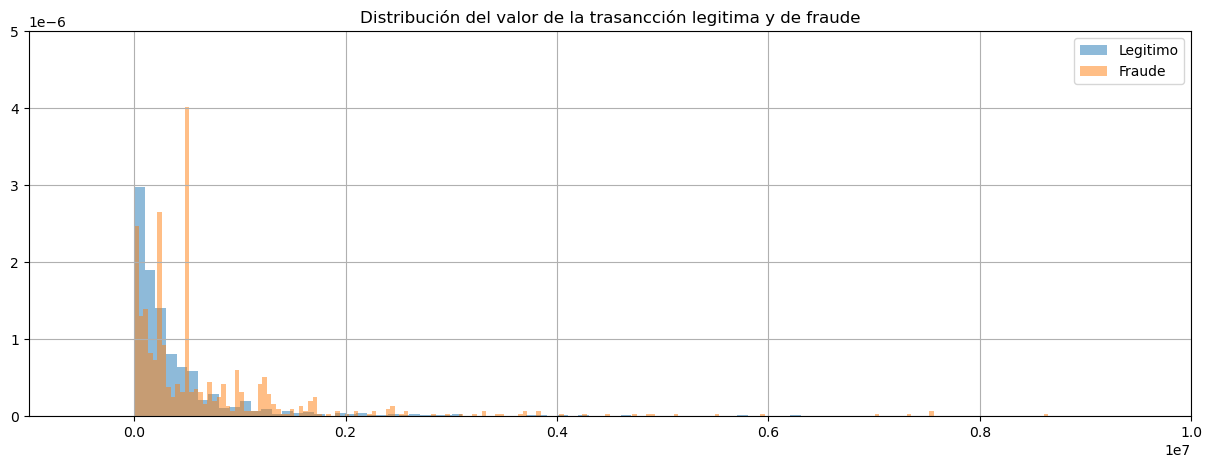

In [248]:
fig = plt.figure(figsize=(15,5))

(ds_train[ds_train['FRAUDE'] == 0]).VALOR.hist(bins=200, alpha=0.5, density=True, label='Legitimo')
(ds_train[ds_train['FRAUDE'] == 1]).VALOR.hist(bins=200, alpha=0.5, density=True, label='Fraude')


plt.legend()

plt.title('Distribución del valor de la trasancción legitima y de fraude')
plt.xlim([-1e6, 1e7])
plt.ylim([0, 0.5e-5])


# Preprocesado de los datos

In [249]:
# Retirar columnas con información corrupta y temporales para evitar cesgos en el modelo
columns_to_drop = ['HORA_AUX', 
                    'id', 
                    #'CANAL', 
                    'FECHA', 
                    #'FECHA_VIN', 
                    'Dist_Sum_INTER', 
                    'Dist_Mean_INTER', 
                    'Dist_Max_INTER', 
                    'Dist_Mean_NAL', 
                    #'DIASEM',
                    #'DIAMES',
                    ]

ds_train = ds_train.drop(columns=np.concatenate([columns_to_drop, ['Dist_max_NAL']]))
ds_test = ds_test.drop(columns=np.concatenate([columns_to_drop, ['Dist_max_COL', 'FECHA_FRAUDE', 'Dist_max_INTER', 'Dist_Sum_NAL', 'Dist_mean_NAL', 'Dist_sum_INTER', 'Dist_mean_INTER']]))

In [250]:
ds_test

,FRAUDE,VALOR,Canal1,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY,Dist_sum_NAL
0,NaN,42230.09,POS,US,POS,5,15,20150316,611,F,Personal Plus,46,20000000,10000000,1,1,4552.41,1.00
1,NaN,143202.65,POS,US,MCI,3,6,19890814,961,F,Preferencial,56,11000000,4500000,3,2,4552.41,1228.07
2,NaN,243591.25,ATM_INT,EC,ATM_INT,0,17,20051201,218,F,Personal Plus,33,9000000,4000000,3,7,5083.41,1944.35
3,NaN,238267.40,ATM_INT,EC,ATM_INT,5,8,19990301,113,F,Personal Plus,53,2300000,500000,1,1,904.81,1.00
4,NaN,490403.58,ATM_INT,US,ATM_INT,5,1,19910330,85,M,Personal,0,0,0,1,1,4552.41,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,531534.03,POS,US,POS,5,1,19890103,929,M,Preferencial,51,19327667,3000000,1,4,4552.41,844.35
96,NaN,52035.08,POS,AW,POS,0,3,19950601,527,M,Preferencial,40,35500000,2000000,2,3,971.23,151.52
97,NaN,18309.04,POS,US,POS,5,15,20150224,178,M,Personal Plus,43,3100000,2000000,1,2,4552.41,122.90
98,NaN,496906.75,ATM_INT,US,ATM_INT,6,16,20090521,156,M,Personal Plus,40,24000000,10500000,1,3,4552.41,1812.93


In [251]:
# Mapeo de variables categoricas a variables numéricas

categorical_columns = ['Canal1', 'COD_PAIS', 'SEXO', 'SEGMENTO', 'CANAL']

label_encoder = LabelEncoder()

for columna in categorical_columns:
    label_encoder.fit(ds_train[columna])
    # Aplica la codificación a ambos conjuntos de datos
    ds_train[columna] = label_encoder.transform(ds_train[columna])
    ds_test[columna] = label_encoder.transform(ds_test[columna])


ds_test

,FRAUDE,VALOR,Canal1,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY,Dist_sum_NAL
0,NaN,42230.09,1,27,2,5,15,20150316,611,0,4,46,20000000,10000000,1,1,4552.41,1.00
1,NaN,143202.65,1,27,1,3,6,19890814,961,0,5,56,11000000,4500000,3,2,4552.41,1228.07
2,NaN,243591.25,0,10,0,0,17,20051201,218,0,4,33,9000000,4000000,3,7,5083.41,1944.35
3,NaN,238267.40,0,10,0,5,8,19990301,113,0,4,53,2300000,500000,1,1,904.81,1.00
4,NaN,490403.58,0,27,0,5,1,19910330,85,1,3,0,0,0,1,1,4552.41,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,531534.03,1,27,2,5,1,19890103,929,1,5,51,19327667,3000000,1,4,4552.41,844.35
96,NaN,52035.08,1,1,2,0,3,19950601,527,1,5,40,35500000,2000000,2,3,971.23,151.52
97,NaN,18309.04,1,27,2,5,15,20150224,178,1,4,43,3100000,2000000,1,2,4552.41,122.90
98,NaN,496906.75,0,27,0,6,16,20090521,156,1,4,40,24000000,10500000,1,3,4552.41,1812.93


In [252]:
ds_train['COD_PAIS'], ds_test['COD_PAIS']

(0       27
 1       27
 2       27
 3       27
 4        6
         ..
 2960    27
 2961    27
 2962    27
 2963    27
 2964     6
 Name: COD_PAIS, Length: 2965, dtype: int32,
 0     27
 1     27
 2     10
 3     10
 4     27
       ..
 95    27
 96     1
 97    27
 98    27
 99    27
 Name: COD_PAIS, Length: 100, dtype: int32)

In [253]:
ds_train.columns, ds_test.columns

(Index(['FRAUDE', 'VALOR', 'Canal1', 'COD_PAIS', 'CANAL', 'DIASEM', 'DIAMES',
        'FECHA_VIN', 'OFICINA_VIN', 'SEXO', 'SEGMENTO', 'EDAD', 'INGRESOS',
        'EGRESOS', 'NROPAISES', 'NROCIUDADES', 'Dist_HOY', 'Dist_sum_NAL'],
       dtype='object'),
 Index(['FRAUDE', 'VALOR', 'Canal1', 'COD_PAIS', 'CANAL', 'DIASEM', 'DIAMES',
        'FECHA_VIN', 'OFICINA_VIN', 'SEXO', 'SEGMENTO', 'EDAD', 'INGRESOS',
        'EGRESOS', 'NROPAISES', 'NROCIUDADES', 'Dist_HOY', 'Dist_sum_NAL'],
       dtype='object'))

In [254]:
# Verificar que no hay valores nan

ds_train = ds_train.dropna()

ds_train.shape

(2941, 18)

In [255]:
# Normalización

scaler = MinMaxScaler()

ds_train = scaler.fit_transform(ds_train)
ds_test = scaler.transform(ds_test)

ds_train[:, 0]


array([1., 1., 1., ..., 0., 0., 1.])

In [256]:
# Shuffle (revolver)

np.random.shuffle(ds_train)



# Muestreo de los datos

In [257]:
# Kfolds

num_folds = 5

kf = KFold(n_splits=num_folds)

# Modelo y entrenamiento

In [258]:
ds_train.shape

(2941, 18)

In [259]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(ds_train.shape[1] - 1,)),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Epoch 1/200
147/147 [==============================] - 1s 3ms/step - loss: 0.5669 - accuracy: 0.7487 - val_loss: 0.5475 - val_accuracy: 0.7640
Epoch 2/200
147/147 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7487 - val_loss: 0.5496 - val_accuracy: 0.7640
Epoch 3/200
147/147 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7487 - val_loss: 0.5537 - val_accuracy: 0.7640
Epoch 4/200
147/147 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7487 - val_loss: 0.5455 - val_accuracy: 0.7640
Epoch 5/200
147/147 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7487 - val_loss: 0.5426 - val_accuracy: 0.7640
Epoch 6/200
147/147 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7487 - val_loss: 0.5415 - val_accuracy: 0.7640
Epoch 7/200
147/147 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7487 - val_loss: 0.5253 - val_accuracy: 0.7640

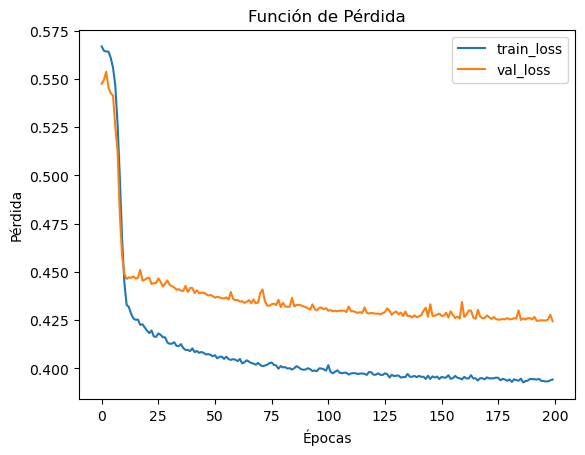

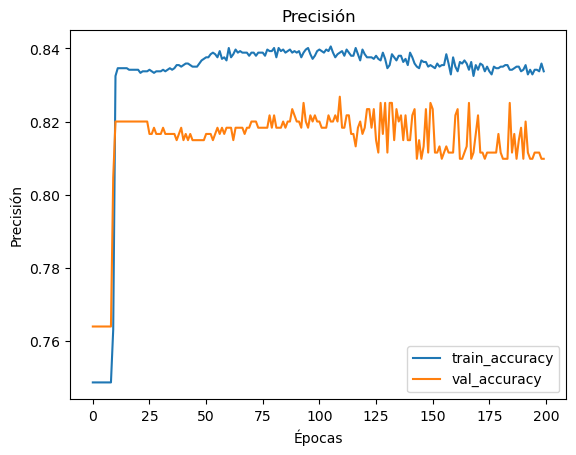

Epoch 1/200
148/148 [==============================] - 1s 3ms/step - loss: 0.6137 - accuracy: 0.6779 - val_loss: 0.5715 - val_accuracy: 0.7415
Epoch 2/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7544 - val_loss: 0.5700 - val_accuracy: 0.7415
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7544 - val_loss: 0.5650 - val_accuracy: 0.7415
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7544 - val_loss: 0.5587 - val_accuracy: 0.7415
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7544 - val_loss: 0.5509 - val_accuracy: 0.7415
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7544 - val_loss: 0.5338 - val_accuracy: 0.7415
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7544 - val_loss: 0.5110 - val_accuracy: 0.7415

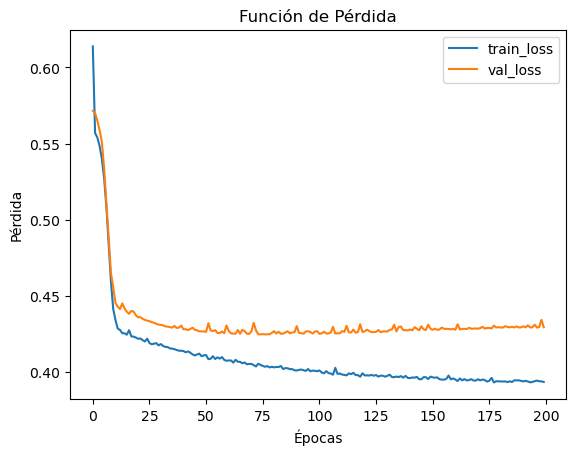

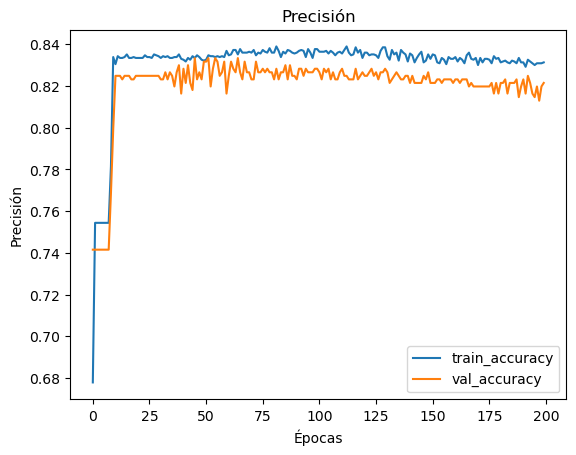

Epoch 1/200
148/148 [==============================] - 1s 3ms/step - loss: 0.5649 - accuracy: 0.7548 - val_loss: 0.5737 - val_accuracy: 0.7398
Epoch 2/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7548 - val_loss: 0.5719 - val_accuracy: 0.7398
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7548 - val_loss: 0.5704 - val_accuracy: 0.7398
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.7548 - val_loss: 0.5685 - val_accuracy: 0.7398
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7548 - val_loss: 0.5627 - val_accuracy: 0.7398
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7548 - val_loss: 0.5546 - val_accuracy: 0.7398
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7548 - val_loss: 0.5389 - val_accuracy: 0.7398

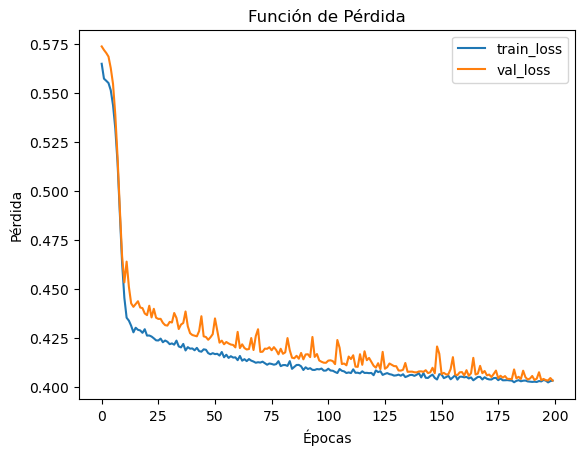

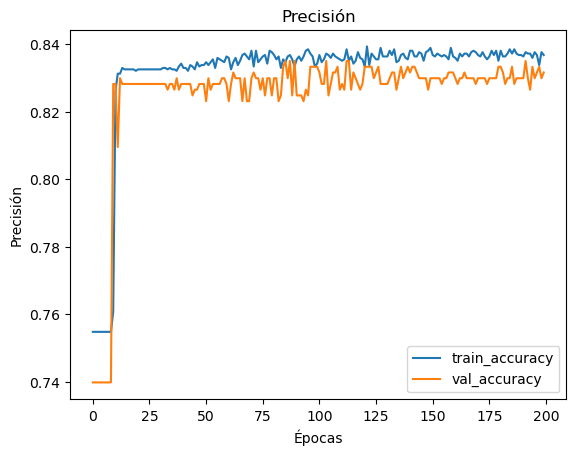

Epoch 1/200
148/148 [==============================] - 1s 3ms/step - loss: 0.6225 - accuracy: 0.6647 - val_loss: 0.5312 - val_accuracy: 0.7806
Epoch 2/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7446 - val_loss: 0.5288 - val_accuracy: 0.7806
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7446 - val_loss: 0.5275 - val_accuracy: 0.7806
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7446 - val_loss: 0.5254 - val_accuracy: 0.7806
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7446 - val_loss: 0.5289 - val_accuracy: 0.7806
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7446 - val_loss: 0.5144 - val_accuracy: 0.7806
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7446 - val_loss: 0.5057 - val_accuracy: 0.7806

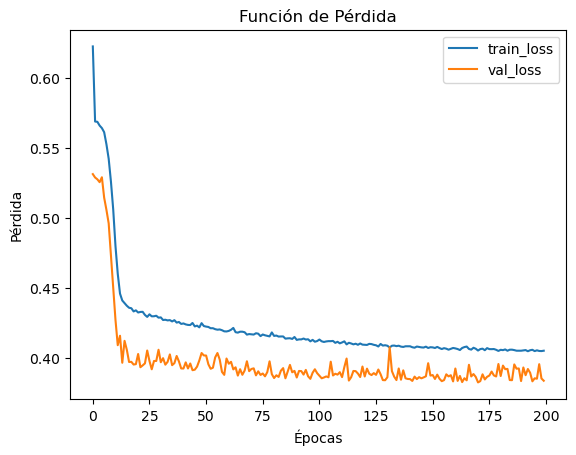

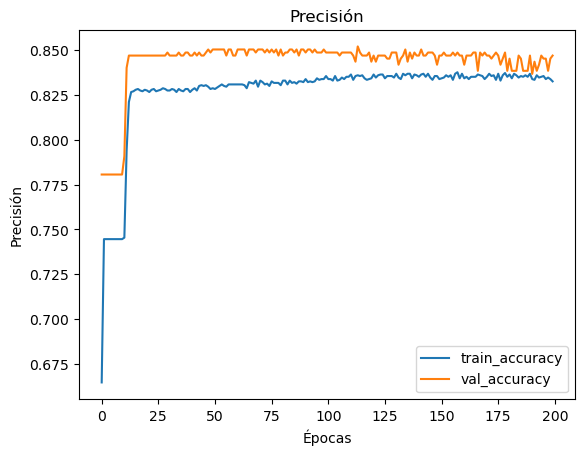

Epoch 1/200
148/148 [==============================] - 1s 3ms/step - loss: 0.5601 - accuracy: 0.7565 - val_loss: 0.5875 - val_accuracy: 0.7330
Epoch 2/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7565 - val_loss: 0.5841 - val_accuracy: 0.7330
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.7565 - val_loss: 0.5828 - val_accuracy: 0.7330
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7565 - val_loss: 0.5792 - val_accuracy: 0.7330
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7565 - val_loss: 0.5793 - val_accuracy: 0.7330
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7565 - val_loss: 0.5714 - val_accuracy: 0.7330
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7565 - val_loss: 0.5624 - val_accuracy: 0.7330

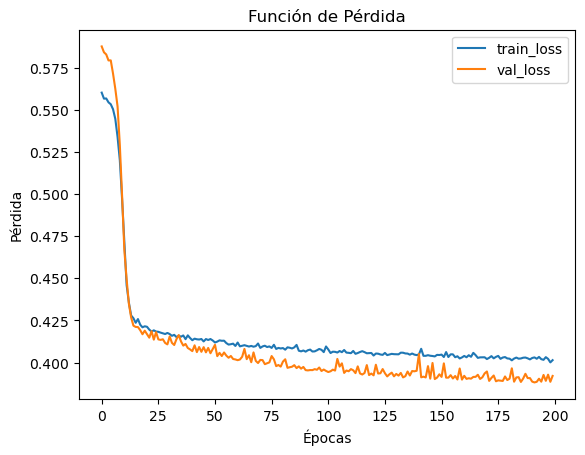

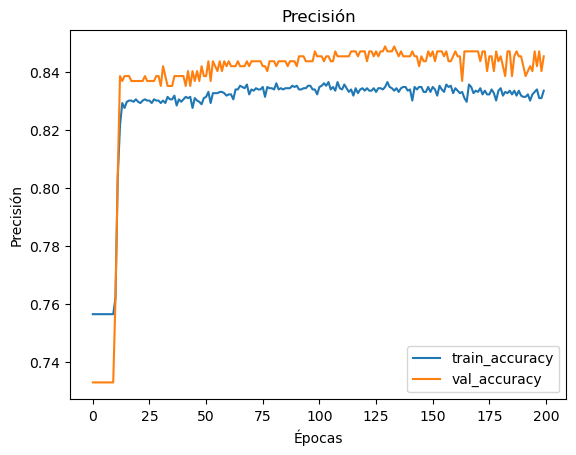

Mean validation accuracy: 0.8310170650482178


In [260]:


kfold_accu = []
for train_index, test_index in kf.split(ds_train[:, 1:]):
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(ds_train.shape[1] - 1,)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

   

    train_features, test_features = ds_train[:, 1:][train_index], ds_train[:, 1:][test_index]
    train_labels, test_labels = ds_train[:, 0][train_index].reshape((-1, 1)), ds_train[:, 0][test_index].reshape((-1, 1))
    # pdb.set_trace()
    
    # Entrena el modelo en este fold
    history = model.fit(train_features, train_labels, epochs=200, batch_size=16, validation_data=(test_features, test_labels))
    
    # Evalúa el modelo en este fold
    test_loss, test_acc = model.evaluate(test_features, test_labels)
    kfold_accu.append(test_acc)
    print('Test accuracy:', test_acc)

    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Función de Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

    # Grafica el accuracy
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

print('Mean validation accuracy: {acc}'.format(acc=np.mean(kfold_accu)))

In [267]:

y_test = np.round(model.predict(ds_test[:, 1:]))
test = pd.read_csv(r'test.csv')

test['FRAUDE'] = y_test

test.to_csv('test_evaluado.csv')


4/4 [==============================] - 0s 2ms/step
